# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 11th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

In [8]:
# We first import some useful libraries
from skimage import io
from matplotlib import pyplot as plt
from skimage.util import img_as_float
from skimage.color import rgb2gray
from skimage.exposure import histogram
import numpy as np
from skimage.transform import resize
from scipy.ndimage import convolve
from skimage.filters import gaussian
from skimage.filters import median
from skimage.morphology import disk
from skimage.feature import canny
from skimage.filters import prewitt
from skimage.filters import sobel
from skimage.filters import sobel_h
from skimage.filters import sobel_v

In [9]:
# Below, we will define some auxiliar functions for the exercises
def show_details(image):
    """
    auxiliar function that shows us the details of the image
        image: the image we want to see its details
    """
    print('Shape:',image.shape)
    print('Data type:',image.dtype)
    print('Max:',image.max())
    print('Min:', image.min())
    print('Size:',image.size)

In [10]:
def show_img(image,titol):
    """
    auxiliar function that plot an image with the corresponding title
    """
    plt.imshow(image, cmap='gray')
    plt.title(titol)
    plt.axis('off')
    plt.show()

In [11]:
def plot_images(images,titles):
    """
    function that shows the images on the same canvas with their corresponding titles
        images: list of images we want to plot together
        titles: list of corresponding titles of the images
    """
    canvas, axs = plt.subplots(nrows=1, ncols=len(images), figsize=(20,20))
    
    for index,image in enumerate(images):
        ax = axs[index]
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        ax.set_title(titles[index])

In [12]:
def plot_details(images,titles):
    """
    show the details of a set of image 
    """
    for index,image in enumerate(images):
        print('\nDetails of ',titles[index])
        show_details(image)

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.


Details of  RGB Rocki
Shape: (1024, 768, 3)
Data type: float64
Max: 1.0
Min: 0.0
Size: 2359296

Details of  Red channel Rocki
Shape: (1024, 768)
Data type: float64
Max: 1.0
Min: 0.0
Size: 786432

Details of  Green channel Rocki
Shape: (1024, 768)
Data type: float64
Max: 1.0
Min: 0.0
Size: 786432

Details of  Blue channel Rocki
Shape: (1024, 768)
Data type: float64
Max: 1.0
Min: 0.0
Size: 786432


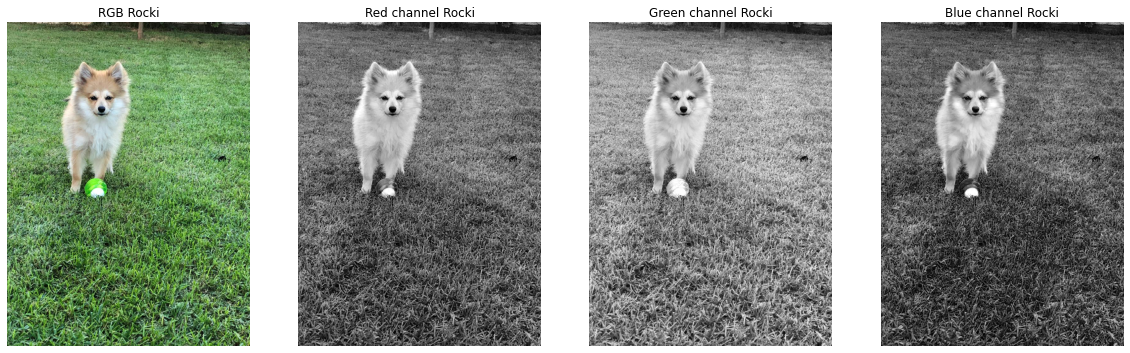

In [13]:
# Load image
rocki = io.imread('images_notebook/rocki.jpeg')

# Plot image
rocki = img_as_float(rocki)

# We separate the channels into 3 images
rockiRed, rockiGreen, rockiBlue = rocki[:,:,0],rocki[:,:,1],rocki[:,:,2]

# Plot images
images = [rocki, rockiRed, rockiGreen, rockiBlue]
titles = ['RGB Rocki','Red channel Rocki','Green channel Rocki','Blue channel Rocki']
plot_images(images,titles)
plot_details(images,titles)

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

In [14]:
def im_hist(im, nbins = 8):
    """
    function that plot the histogram of RGB and grayscale images with the correponding number of bins
        im: orginal image
        nbins: the number of bins we want to plot with, by default it will be 8
    """
    
    # Convert image to grayscale image if necessary
    if len(im.shape) > 2:
        imGray = rgb2gray(im)
    
    # We get the images separated by channels
    imRed = im[:,:,0]
    imGreen = im[:,:,1]
    imBlue = im[:,:,2]
    
    # Histogram function returns two arrays:
    # 1. array that represnts the values of the histogram
    # 2. array with the values at the center of the bins
    hstGray, bins_im = histogram(imGray, nbins)
    hstRed, bins_red = histogram(imRed, nbins)
    hstGreen, bins_green =  histogram(imGreen, nbins)
    hstBlue, bins_blue =  histogram(imBlue, nbins)
    
    # Get the x cordinates of the bar list we should use
    ind = np.arange(nbins)
    
    # Place bars containers of the corresponding images on the axes
    canvas, axs = plt.subplots(ncols = 1, figsize = (18, 7))
    axs.bar(ind,hstGray,0.1,color='gray')
    axs.bar(ind+0.1,hstRed,0.1,color='r')
    axs.bar(ind+0.2,hstGreen,0.1,color='g')
    axs.bar(ind+0.3,hstBlue,0.1,color='b')
    
    # Place a legend on the axes
    axs.legend(['Gray','Red','Green','Blue'],loc=1, prop={'size': 20})
    
    # set title on the axes
    axs.set_title('Histogram with ' + str(nbins) + ' nbins')
    
    # plot the figure
    plt.show()

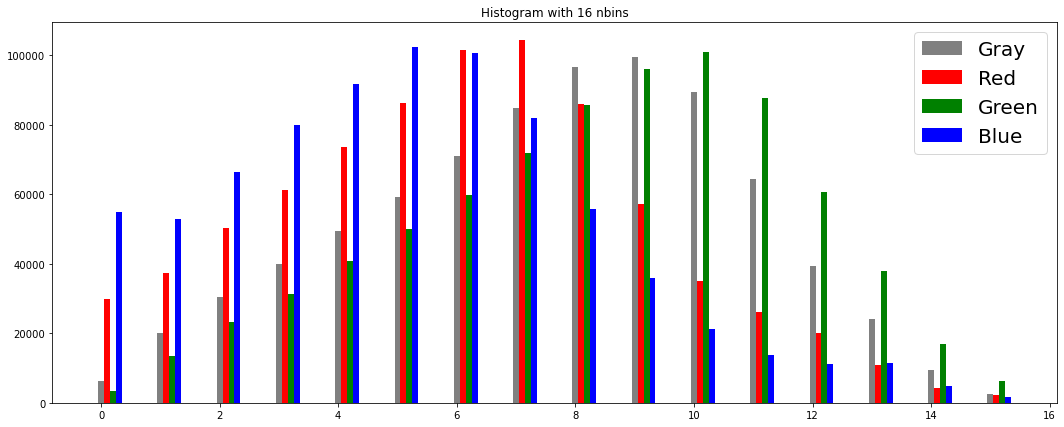

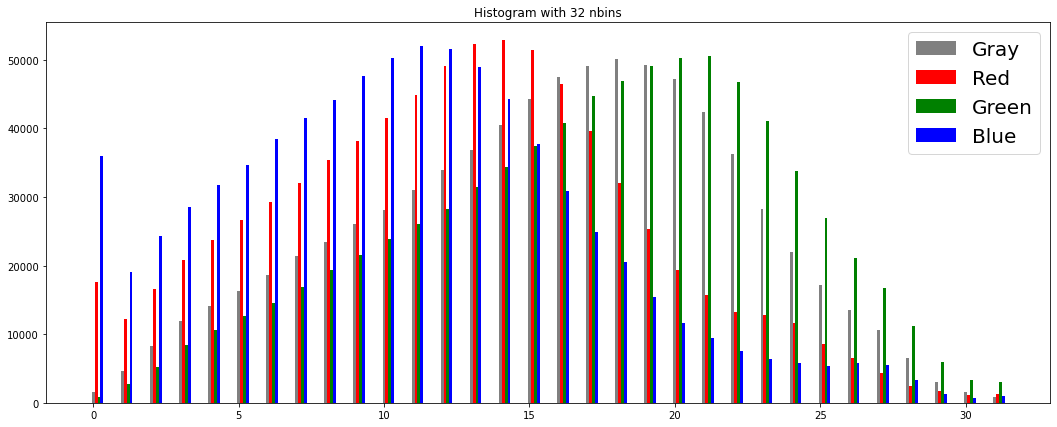

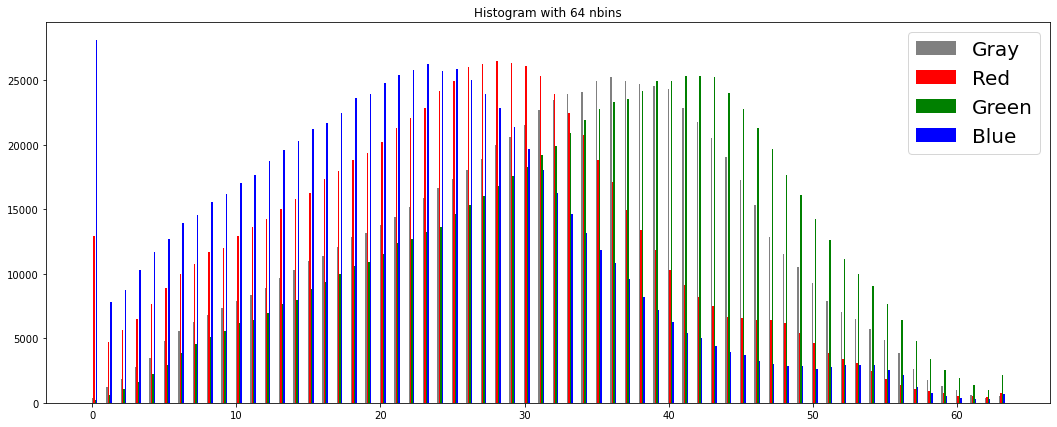

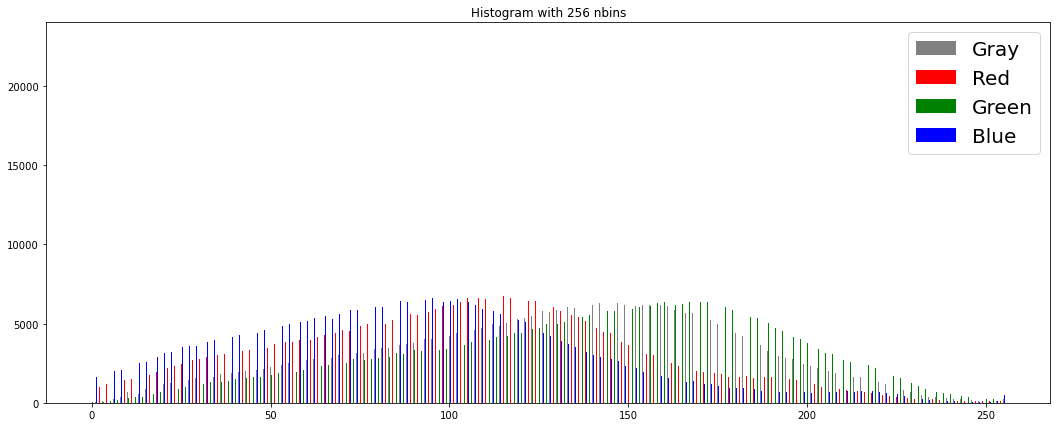

In [15]:
set_bins = [16,32,64,256]

# plot the images with the requested bins
for index, bins in enumerate(set_bins):
    im_hist(rocki, bins)

Answers for the proposed questions:

**1. What is the histogram representing for an image?**
    
   The histogram represents the photometric resolution, that shows us the range or level of colors that we are using, counting the intensity or quantity. If there are more "shades" of colors and difference are the pixels of the image, more contrast there is, that last comment if for black and white photographs.


**2. What are the bins representing?**
    
   The bins are the cardinal of how many levels we want to show, that represents the condensation of a chunck of colors. We mean that if you have, for exemple, 8 bins, you can see which is the most used color or which are more used in your image in that bin section. And each bin contains the number of pixel we have in a range of color, for exemple, if we have 256 colors, for 16 bins, we have in each one 16 colors. Of course, if you use the maximal number of bins, wich is the cardinal of diferent value of color you used, it represent more details.


**3. Compare and comment their differences.**
    
   Have seen those images, we notice that the gray level histogram is similar to these color ones, almost in the medium.
   Then, we can see the first bin in the three tops ones have a special magnitude. It appears in that form cause there are less similar colors.
   But, if we compare these four histograms, them still keep the ratio. A part from that, we can see that as we increase the number of bins, the changes in the histogram will be more influential

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


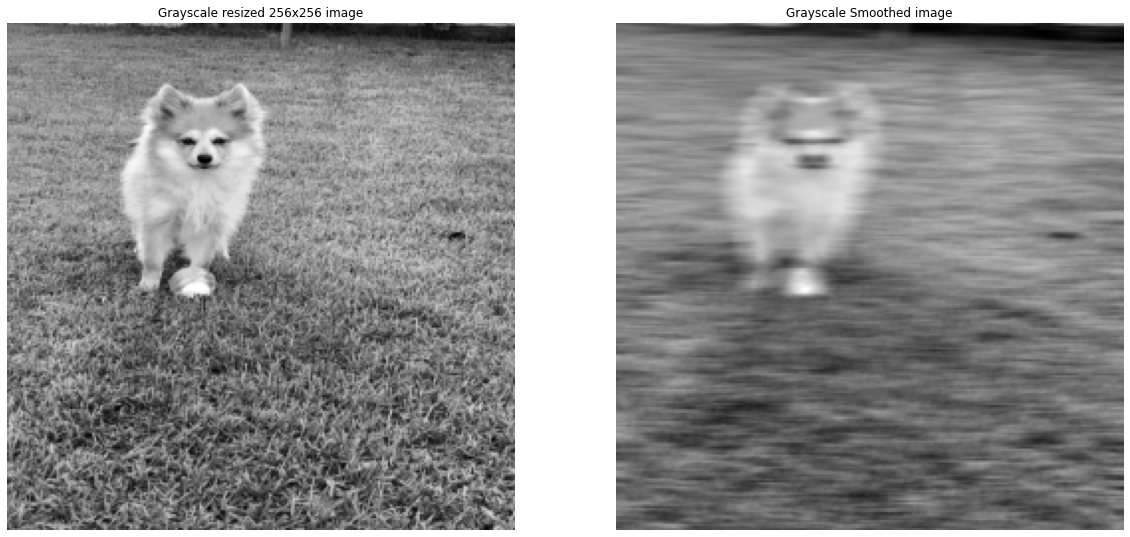

In [16]:
# Convert rgb to grayscale image
rocki_gray = rgb2gray(rocki)

# Reshape image to 256x256
rocki_gray = resize(rocki_gray,(256,256))

# Define and normalize the mask
mask_h1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
mask_h1d = mask_h1d/np.sum(mask_h1d)

# Convolve the image using the mask
rocki_gray_smooth_h1d = convolve(rocki_gray, mask_h1d, mode='reflect')

# Plot images
images = [rocki_gray,rocki_gray_smooth_h1d]
titles = ['Grayscale resized 256x256 image','Grayscale Smoothed image']
plot_images(images,titles)

Questions:
    
   **1.Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image?**
   
   The definition of the mask is truly important. First, you can see in the result image we have applied a horizontal mask and we get smoothed horizontally the image (highlight the horizontal lines). We have managed to smooth the contours only horizontally, the opposite would be the same if we applied a vertical mask, it will smooth the vetical lines. And if we apply a nxn matrix mask, we will get an all smoothed one, we will not highlight neither vertical nor horizontal, it would leave an image that we really want to be smoothed, like a little blur. Therefore the mask matters. And don't forget that normalizing also matters, so that the range of values in the image is the starting one.

b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


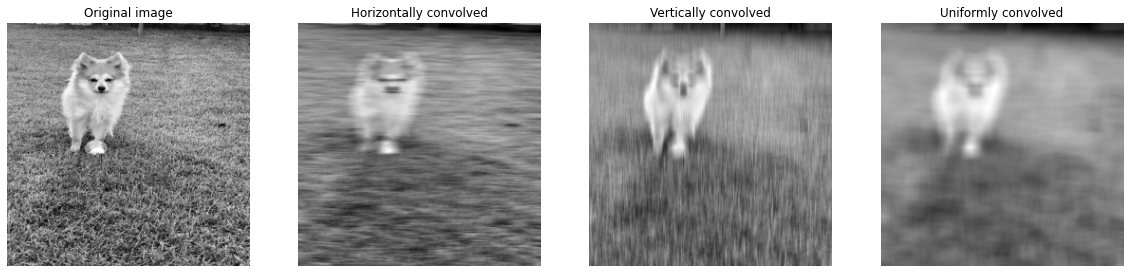

In [17]:
# Define the vertically convolution and normalize the mask
mask_v1d = mask_h1d.transpose()
mask_v1d = mask_v1d/np.sum(mask_v1d)

# Convolve the image using this mask
rocki_gray_smooth_v1d = convolve(rocki_gray, mask_v1d, mode='reflect')

# Define the uniform convolution and normalize the mask
mask_u1d = np.ones((15,15))
mask_u1d = mask_u1d/np.sum(mask_u1d)

# Convolve the image using this mask
rocki_gray_smooth_u1d = convolve(rocki_gray, mask_u1d, mode='reflect')

# Plot images
images = [rocki_gray,rocki_gray_smooth_h1d,rocki_gray_smooth_v1d,rocki_gray_smooth_u1d]
titles = ['Original image','Horizontally convolved','Vertically convolved','Uniformly convolved']
plot_images(images,titles)

c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


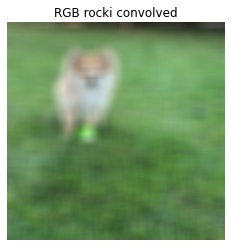

In [18]:
def conv_coor(image, mask):
    """
    function that applies a 3-channel filter
        image: image we want to convolve
        mask: mask we use for convolving
    return:
        image convolved
    """
    # normalize the mask
    mask = mask/np.sum(mask)
    
    # convolve the image using the mask
    image[:,:,0] = convolve(image[:,:,0], mask, mode='reflect')
    image[:,:,1] = convolve(image[:,:,1], mask, mode='reflect')
    image[:,:,2] = convolve(image[:,:,2], mask, mode='reflect')
    
    return image

# now we apply to our image
rocki2 = resize(rocki,(256,256))
rocki_convolved = conv_coor(rocki2, np.ones((15,15)))

show_img(rocki_convolved,'RGB rocki convolved')

Questions:
    
   **1. Can we convolve a color (RGB) image?**
   
   As we have done in the last exercise, the answer is it possible. In that case, we convolve the 3 channels at the same time.

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.


In [19]:
def plot_histogram(ind, histogram, title):
    """
    function that plots a single histogram of a grayscale image 
    """
    canvas, axs = plt.subplots(ncols = 1, figsize = (18,7))
    
    # Place bars containers of the corresponding images on the axes
    axs.bar(ind,histogram,0.3,color='gray')
    axs.set_title(title)
    plt.show()

Shape: (256, 256)
Data type: float64
Max: 0.9981931422608259
Min: 0.023370525962053385
Size: 65536


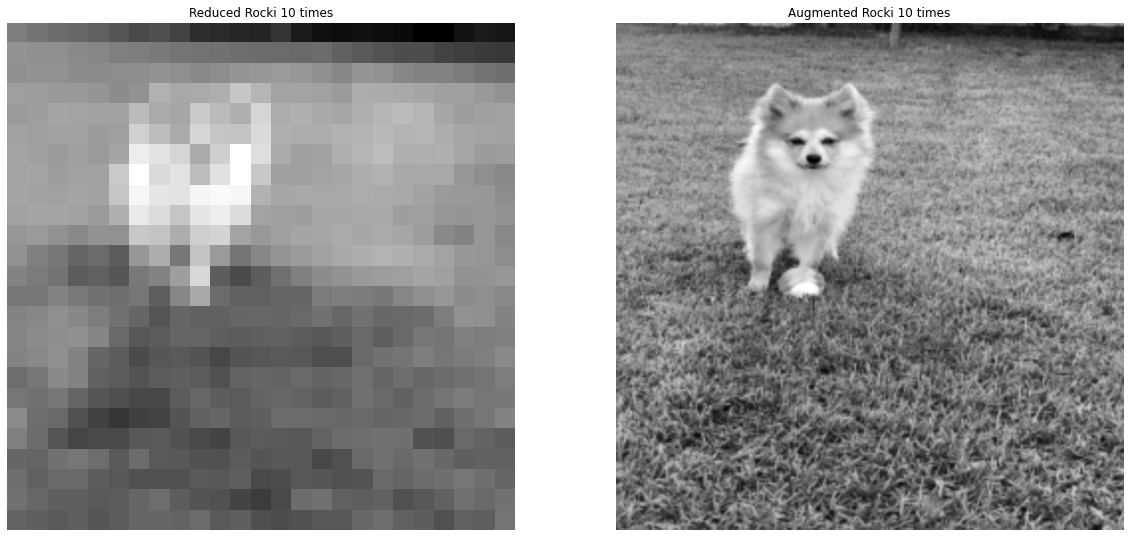

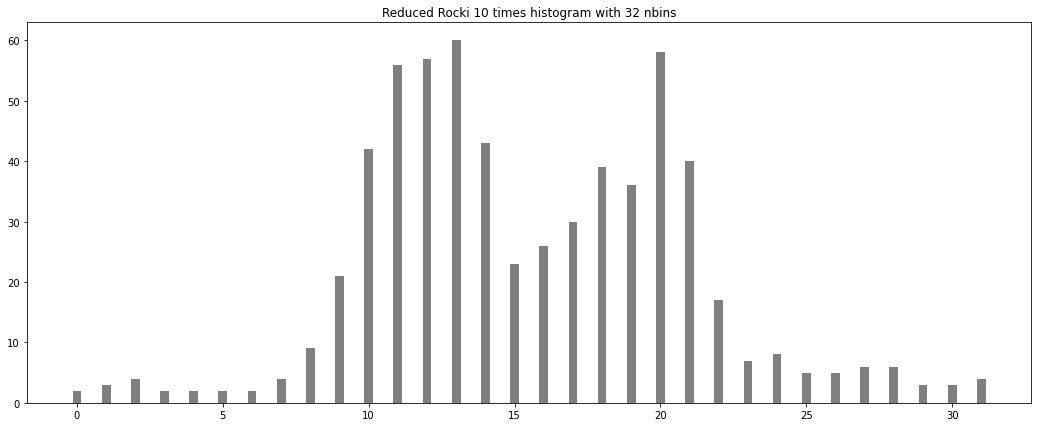

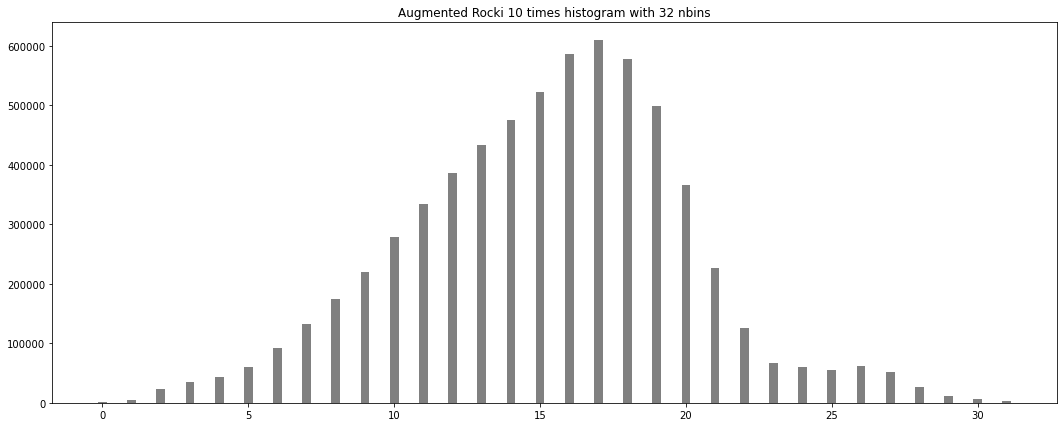

In [20]:
# We define any number of bins
nbins = 32

# Reduce rocki_gray 10 times and augment rocki 10 times respectively
# We get rocki_gray from the before exercise or create from original one
# rocki_gray = rgb2gray(rocki_gray)
reduced = resize(rocki_gray, (rocki_gray.shape[0] // 10, rocki_gray.shape[1] // 10))
augmented = resize(rocki_gray, (rocki_gray.shape[0] * 10, rocki_gray.shape[1] * 10))

# Plot reduced and augmented images 
images = [reduced,augmented]
titles = ['Reduced Rocki 10 times','Augmented Rocki 10 times']
plot_images(images,titles)
show_details(rocki_gray)

# Get histograms of reduced and augmented images
hstRed, b_r = histogram(reduced, 32)
hstAug, b_a = histogram(augmented, 32)
histograms = [hstRed, hstAug]

# Get the x coordinates of the bar list we should use
ind = np.arange(32)
    
for i in range(len(images)):
    plot_histogram(ind,histograms[i],titles[i]+' histogram with 32 nbins')

Questions:
    
   **1.Is there any difference?**
   
   Looking at the result histograms, we can see their most important difference is the quantity of each graylevel pixel. The another important thing is that, seeing both results, the second histogram looks softer and not like the first one that can be seen from sudden changes. This tells us which of the images is smoother because the neighbors have similar colors so we can have a smooth histogram.

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

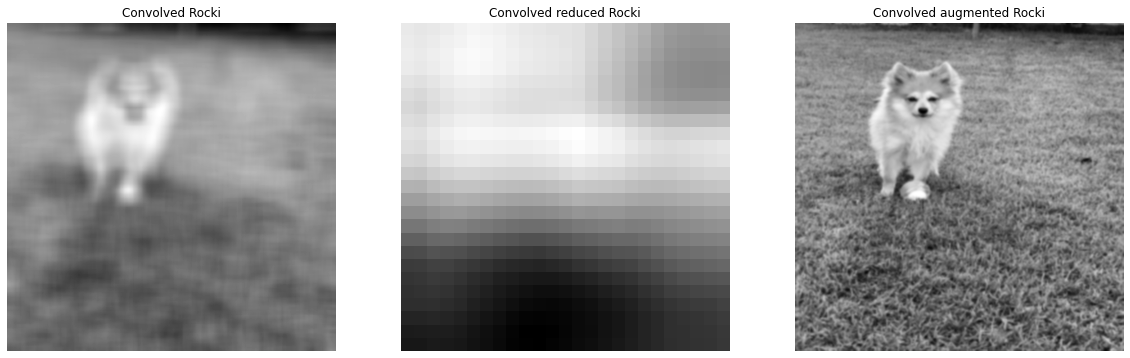

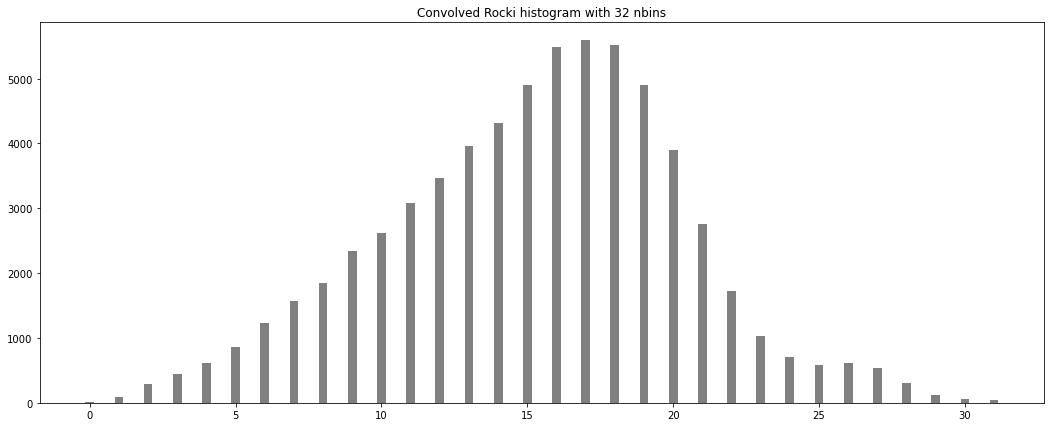

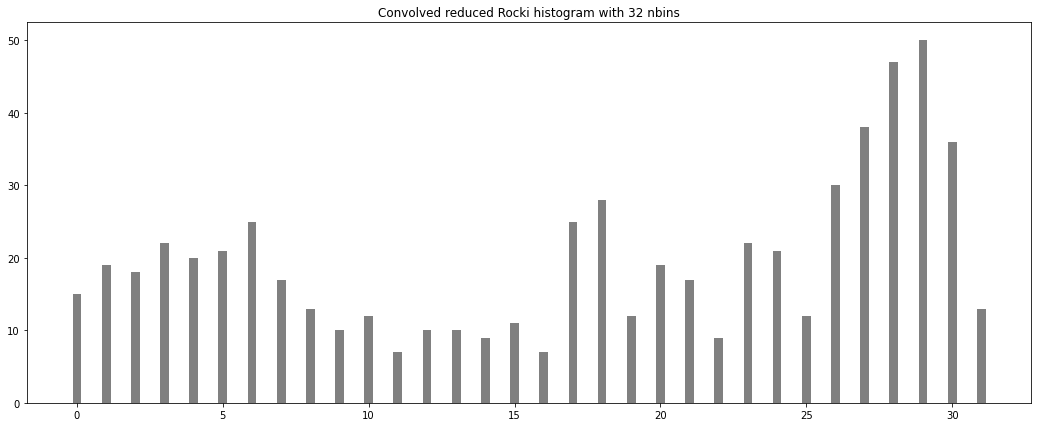

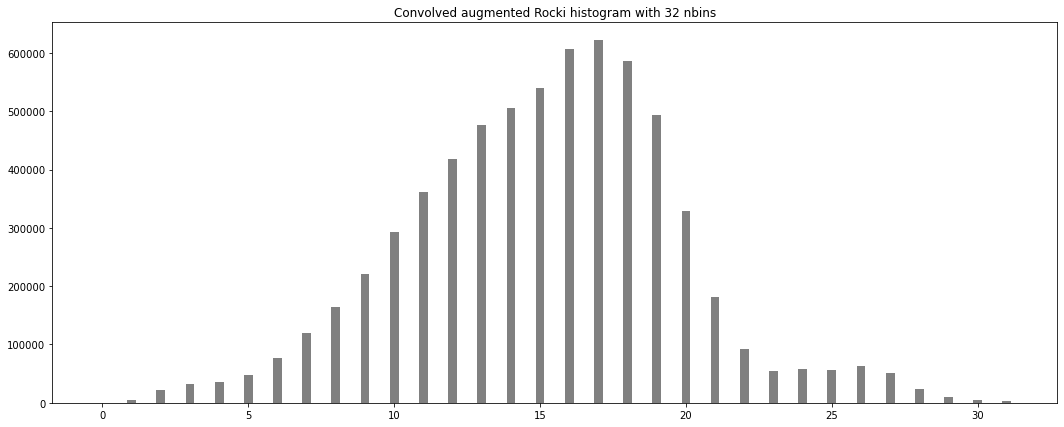

In [21]:
# Create a 15 x 15 uniform mask and normalize it
mask = np.ones((15,15))
mask = mask/np.sum(mask)

# Apply convolution on the three images
rocki_convolved = convolve(rocki_gray, mask, mode='reflect')
reduced_convolved = convolve(reduced, mask, mode='reflect')
augmented_convolved = convolve(augmented, mask, mode='reflect')

images = [rocki_convolved, reduced_convolved, augmented_convolved]
titles = ['Convolved Rocki','Convolved reduced Rocki','Convolved augmented Rocki']
plot_images(images,titles)

# Get histograms of original, reduced and augmented images
hst_rocki = histogram(rocki_gray,nbins)[0]
hst_red = histogram(reduced_convolved,nbins)[0]
hst_aug = histogram(augmented_convolved,nbins)[0]
histograms = [hst_rocki, hst_red, hst_aug]

# Get the x cordinates of the bar list we should use
ind = np.arange(nbins)

# Plot the result images
for i in range(len(images)):
    plot_histogram(ind, histograms[i], titles[i] + ' histogram with 32 nbins')

Questions:
    
   **1. What happens and why?**
   
   Now we have three images that have difference in shape, and if using the same mask, we will have different results. The result, as we can see, is that with the smaller image it becomes very blurry while the other one does not (the others two seems that nothing has changed). Futhermore, the small image histogram is very spread out because there are few colors and with abrupt changes. Not like the large pixel one. The best example is that if we have a small image and we apply a mask of a certain size, but if we then apply the same mask to a larger image, what we do is apply the action of smoothing to "fewer neighboring pixels", they are less affected.
   So, the larger image's histogram seems that almost nothing has changed.

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

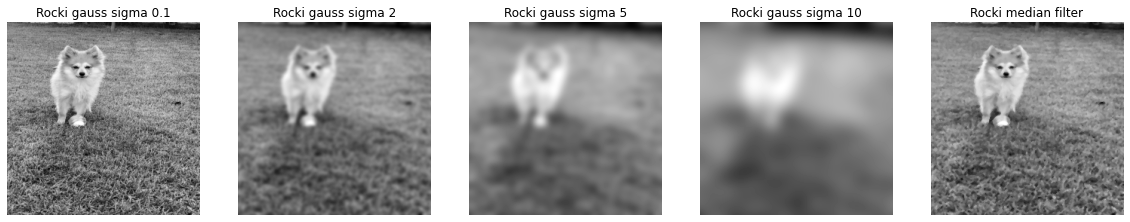

In [22]:
# We create the images applying Gaussian filter with different sigmas and median filter
sigma1 = gaussian(rocki_gray, sigma = 0.1)
sigma2 = gaussian(rocki_gray, sigma = 2)
sigma5 = gaussian(rocki_gray, sigma = 5)
sigma10 = gaussian(rocki_gray, sigma = 10)
med = median(rocki_gray)

# Visualize the imsges
images = [sigma1,sigma2,sigma5,sigma10,med]
titles = ['Rocki gauss sigma 0.1','Rocki gauss sigma 2','Rocki gauss sigma 5','Rocki gauss sigma 10','Rocki median filter']
plot_images(images,titles)

Questions:
    
   **1. Which is the most adequate value for keeping the main objects and structures of the image?**
   
   Checking for the results, we can say that the most adequate value for keeping the main objects and structures of the image is using a smaller sigma for Gaussian filter or the median filter that have a similar effect.
   
   **Comment the effect of using different kinds of filters on the original image.**
   
   We used two types of filter: the Gaussian with different sigmas and the median. Using the median one we smooth the image keeping the original color and not like mean filter that we were possible creating new colors. But using the gaussian one we smooth the image taking a distance from the smoothing pixel depending the sigma. That is if your sigma is bigger, the number of pixel affected will be bigger too.

b) **(Optional)** Apply the smoothing on some other images and present their results.

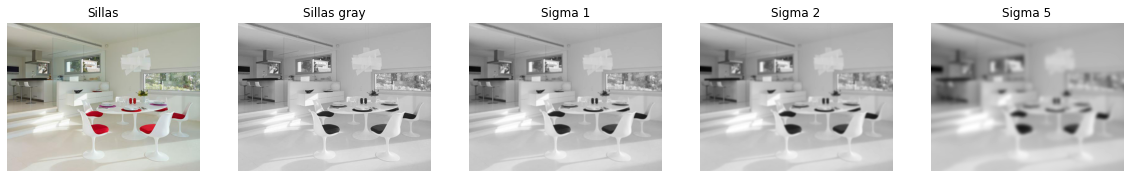

In [23]:
# Load image from images_notebook
sillas = io.imread('images_notebook/sillas.jpg')

# Covnert sillas image to grayscale image 
sillas_gray = rgb2gray(sillas)

# Apply gaussian filter with different values of sigma: 1, 2, 5
gaussians = [sillas,sillas_gray]
titles = ['Sillas','Sillas gray']
sigmas = [1,2,5]
for i in sigmas:
    gaussians.append(gaussian(sillas_gray,sigma=i))
    titles.append('Sigma ' + str(i))

# Plot images
plot_images(gaussians,titles)

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

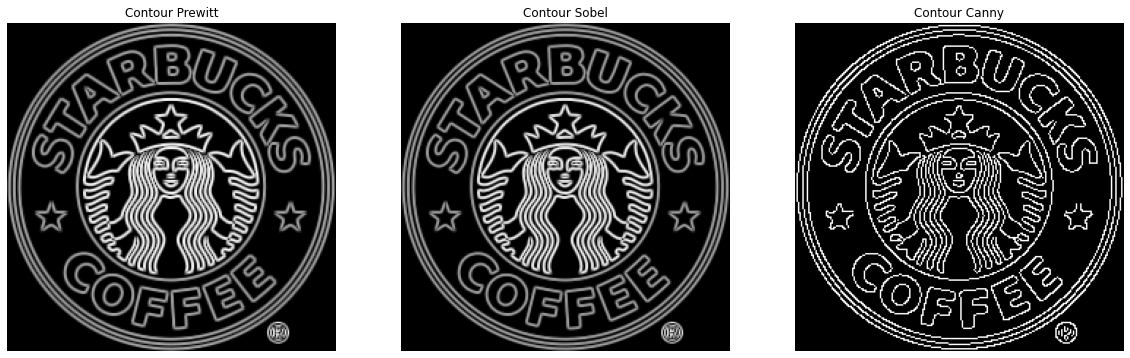

In [24]:
import warnings
warnings.filterwarnings("ignore")

# Load image logo.png
logo = io.imread('images_notebook/logo.png')

# Convert logo to grayscale image
logo_gray = rgb2gray(logo)

# Apply different contour extraction tecniques
# Prewitt
contour_prewitt = prewitt(logo_gray)
# Sobel
contour_sobel = sobel(logo_gray)
# Canny
contour_canny = canny(logo_gray)

# Plot them to visualize
contours = [contour_prewitt,contour_sobel,contour_canny]
titles = ['Contour Prewitt','Contour Sobel','Contour Canny']
plot_images(contours,titles)

Questions:
    
   **1. Which is the best countour detection technique?**
   
   As we can see the three pictures, we can say that using the gaussian applying with the canny algorithm is better. Because we can appreciate the contours clearly than the others.
  
  **2. Which are the optimal parameters for this image?**
   
   For the skimage.feature algorithms we have for canny: **skimage.feature.canny**(image, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False,* , mode='constant', cval=0.0) all optional except image. We can use a different sigma like following. Then, **skimage.filters.prewitt**(image, mask=None, *,* axis=None, mode='reflect', cval=0.0) all optional except image, as we can use a mask. And, **skimage.filters.sobel**(image, mask=None, *, axis=None, mode='reflect', cval=0.0), same as prewitt.

   **3. Is it necessary to normalize the mask as we do in the filtering applied for the smoothing?**
   
   Yes, we need to normalize the mask like when filtering images but the result of the sum of the mask need to be 0. Because we want that in constant regions it have a 0, no response for this pixel o region.

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

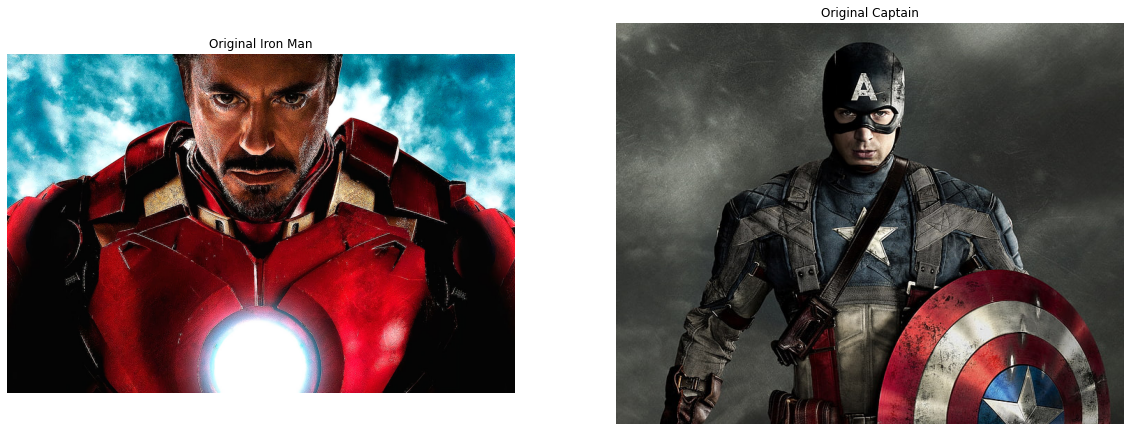

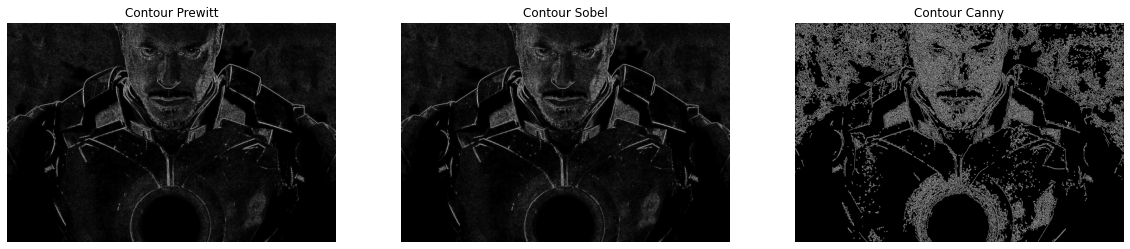

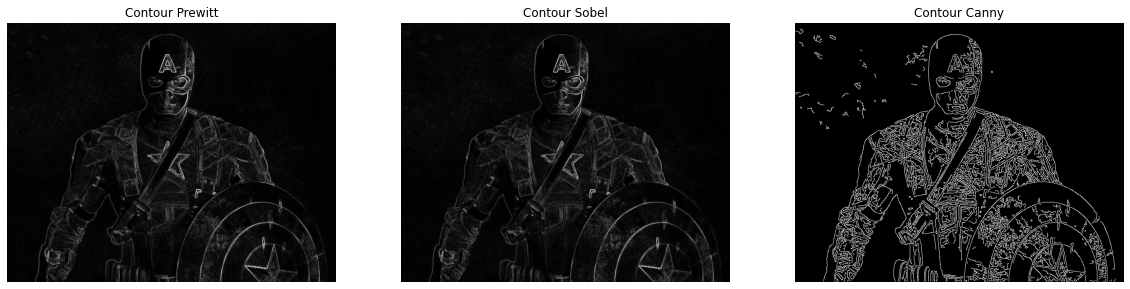

In [25]:
# Load images from images_notebook
iron = io.imread('images_notebook/Ironman.jpg')
captain = io.imread('images_notebook/Capitain_America.jpg')

# convert theses images to grayscale images
iron_gray = rgb2gray(iron)
captain_gray = rgb2gray(captain)
turn = [iron_gray,captain_gray]


# First we plot the original ones
images = [iron,captain]
titles = ['Original Iron Man','Original Captain']
plot_images(images,titles)

for i in range(2):
    # Apply different contour extraction techniques
    # Prewitt
    contour_prewitt = prewitt(turn[i])
    # Sobel
    contour_sobel = sobel(turn[i])
    # Canny
    contour_canny = canny(turn[i])
    images = [contour_prewitt,contour_sobel,contour_canny]
    titles = ['Contour Prewitt','Contour Sobel','Contour Canny']
    # Plot images
    plot_images(images,titles)

Questions:
    
   **1. Are the contours improved if the image is previously smoothed?**
   
   The answer is yes. If we smooth the image fisrt, when we need to get the derivatives, it will be clear and not alternating every moment. Smooth a image before applying contours techniques make as a fluent or like a "summary" of the contour of the image.
  
  **2. Which are the limitations of the different images contour extraction?**
   
   One limitation of contour extraction is that not ever the result image is what we want. We mean, if there are two regions with a so similar color entorn, but them are different things, maybe the contour extraction will not detect it. So, we are talking about the loss of information.
   

In [26]:
# We look at the official filter documentation and look for the available sobel filters and find 3 of them, of which they are:
# 1. sobel: Find edges in an image using the Sobel filter.
# 2. sobel_h: Find the horizontal edges of an image using the Sobel transform.
# 3. sobel_v: Find the vertical edges of an image using the Sobel transform.

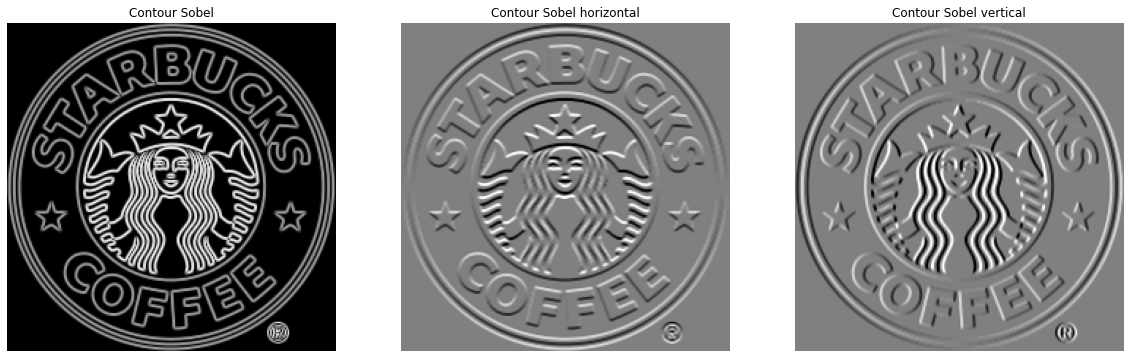

In [27]:
# Sobel
contour_sobel = sobel(logo_gray)

# Horizontal Sobel
contour_sobel_h = sobel_h(logo_gray)

# Vertical Sobel
contour_sobel_v = sobel_v(logo_gray)

# Visualise them
images = [contour_sobel,contour_sobel_h,contour_sobel_v]
titles = ['Contour Sobel','Contour Sobel horizontal','Contour Sobel vertical']
plot_images(images,titles)

Questions:
    
  **1. How many different ways can the Sobel detector be applied?**
       
   We look at the official filter documentation and look for the available sobel filters and find 3 of them, of which they are:
    1. sobel: Find edges in an image using the Sobel filter.
    2. sobel_h: Find the horizontal edges of an image using the Sobel transform.
    3. sobel_v: Find the vertical edges of an image using the Sobel transform.
  
  **2. Compare the obtained results.**
   
   Now we can see the three images, and we realise that the most important difference is the form of the girl's hair. The letters looks the same in both horizontal or vertical, but the hair's wave are different. However, in that case, the vertical sobel one keep better the original image forms.

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


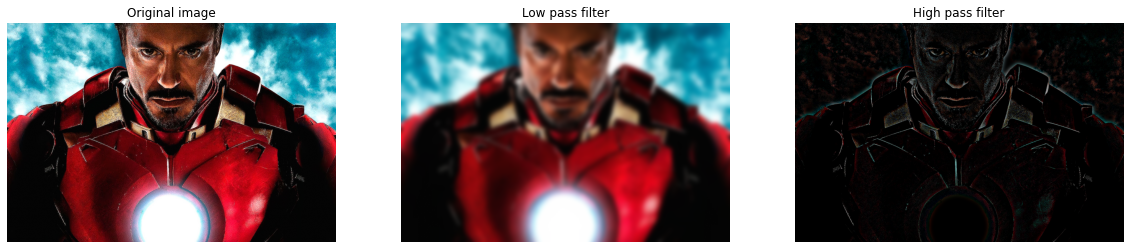

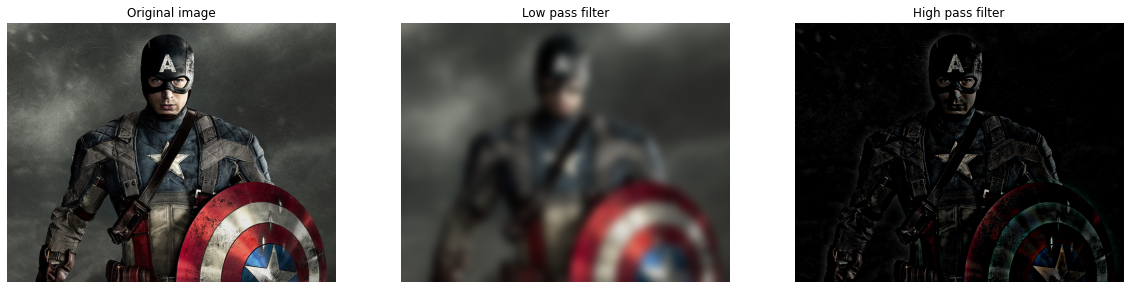

In [28]:
# Convert the images to float64
iron = img_as_float(iron)
captain = img_as_float(captain)

# We create both low pass and high pass filter
low_pass_iron = gaussian(iron, sigma = 10)
high_pass_iron = iron - low_pass_iron

low_pass_captain = gaussian(captain, sigma = 10)
high_pass_captain = captain - low_pass_captain

# Plot images
images = [iron,low_pass_iron,high_pass_iron]
titles = ['Original image','Low pass filter','High pass filter']
plot_images(images,titles)

images = [captain,low_pass_captain,high_pass_captain]
titles = ['Original image','Low pass filter','High pass filter']
plot_images(images,titles)

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


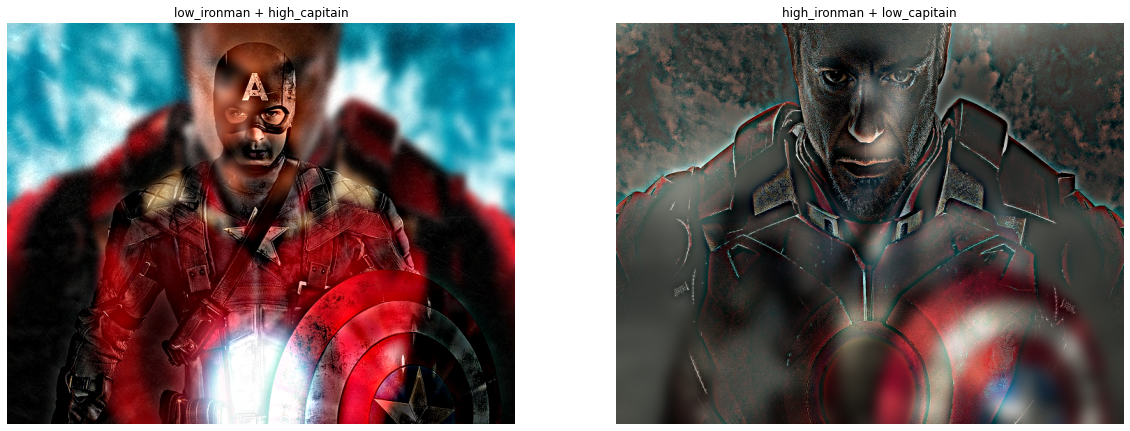

In [29]:
# As both have diference shape, we resize one of them, for ejemplo the iron man
low_pass_iron = resize(low_pass_iron,(captain.shape[0],captain.shape[1]))
high_pass_iron = resize(high_pass_iron,(captain.shape[0],captain.shape[1]))

# We join the high and low filters
low_ironman = low_pass_iron + high_pass_captain
high_ironman = low_pass_captain + high_pass_iron

# Visualize them
images = [low_ironman,high_ironman]
titles = ['low_ironman + high_capitain','high_ironman + low_capitain']
plot_images(images,titles)

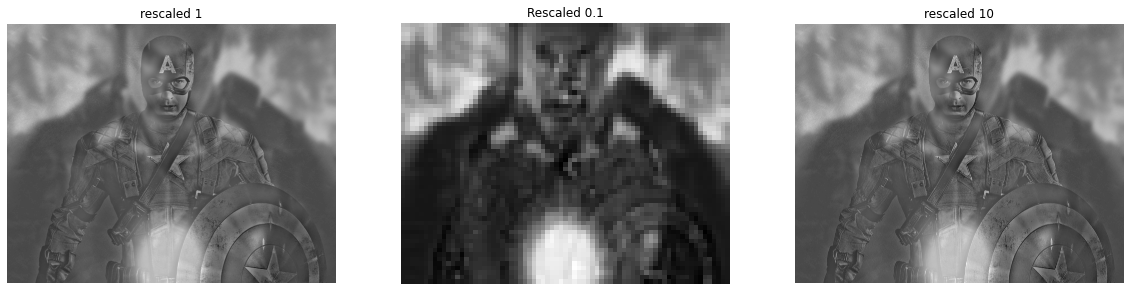

In [30]:
from skimage.transform import rescale

# We rescale the image but first we convert it in grayscale
low_ironman = rgb2gray(low_ironman)
rescaled1 = rescale(low_ironman, 1)
rescaled01 = rescale(low_ironman, 0.1)
rescaled10 = rescale(low_ironman, 10)

images = [rescaled1,rescaled01,rescaled10]
titles = ['rescaled 1','Rescaled 0.1','rescaled 10']
# Plot images
plot_images(images,titles)

Questions:
    
  **1. Analyze which is the best way of showing it if our aim is to see the Ironman face.**
       
   If we want to see the ironman face, we use the high ironman and low captain image. Because the more smoothed image will be the captain image (more blur).
  
  **2. Additionally, rescale the image to a different size and comment the results.**
   
   Now we rescale the image, for exemple, to 1, 0.1 and 10. So we can see that bigger is more clear will be seen the high pass image.

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html)). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


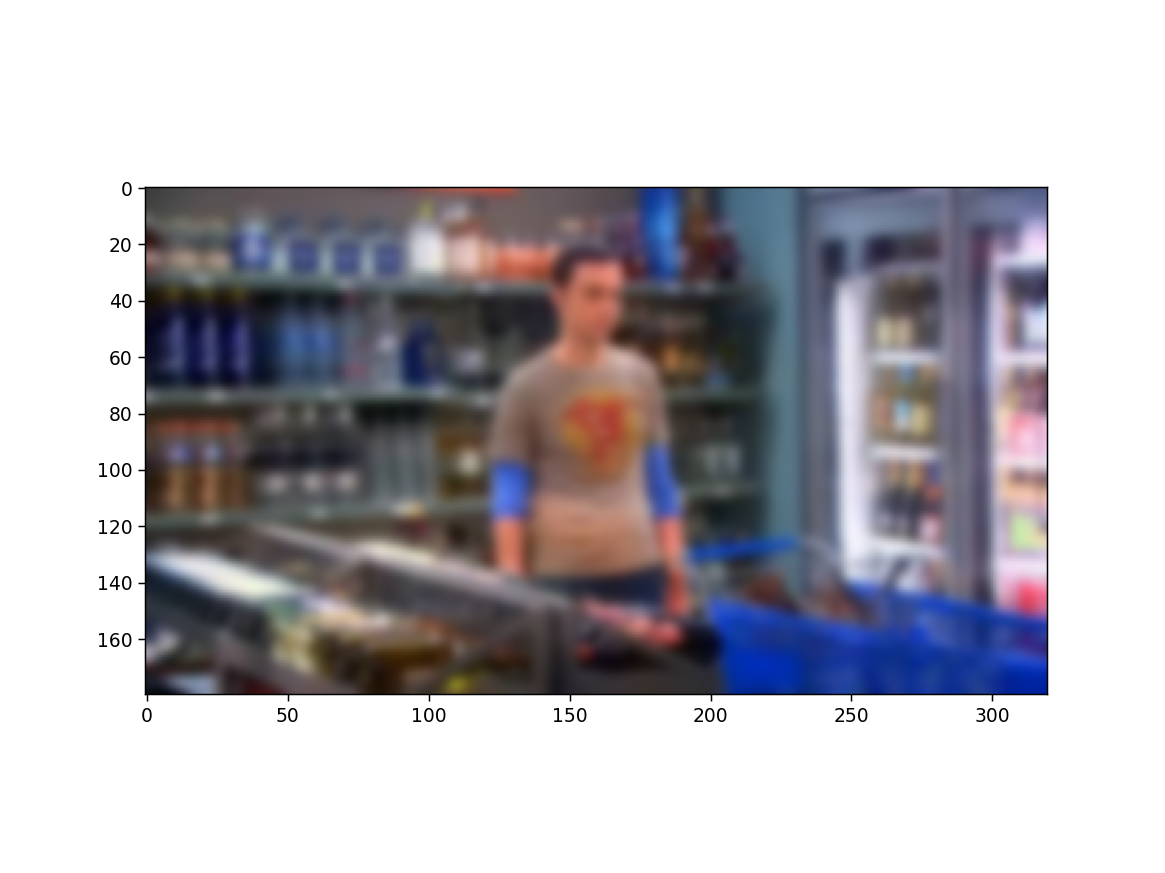

In [31]:

""""Showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale = 0.5
frames = len(ic)
height = np.int((ic[0].shape[0])*scale)
width = np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# Create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# Combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i] = transform.rescale(ic[i],scale, multichannel=True)
        # We use a gaussian filter with sigma 2 for exemple, it will be more blurred when the sigma is bigger
        ic_small[:,:,:,i] = gaussian(ic_small[:,:,:,i], sigma = 2)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    im.set_array(ic_small[:,:,:,i]) # Showing the small image
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


In [32]:
import warnings
warnings.filterwarnings("ignore")